In [1]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import state_fidelity, partial_trace
import matplotlib.pyplot as plt

In [2]:
import kaleidoscope.qiskit
from kaleidoscope import bloch_sphere

In [3]:
from qiskit.quantum_info import DensityMatrix, Statevector

def getDensityMatrix(circuit):
    return DensityMatrix(circuit).data

def getStatevector(circuit):
    return Statevector(circuit).data

In [4]:
import warnings
warnings.filterwarnings('ignore')

# 1. Circuits Sampler

In [5]:
def sampleI():
    circuit = QuantumCircuit(1)
    circuit.i(0)
    
    return circuit

In [6]:
def sampleHU1():
    circuit = QuantumCircuit(1)
    
    circuit.h(0)
    circuit.u1(np.random.uniform(0, np.pi * 2), 0)
    
    return circuit

In [7]:
def sampleHU2():
    circuit = QuantumCircuit(1)
    
    circuit.h(0)
    circuit.u2(np.random.uniform(0, np.pi * 2), np.random.uniform(0, np.pi * 2), 0)
    
    return circuit

In [8]:
def sampleHU3():
    circuit = QuantumCircuit(1)
    
    circuit.h(0)
    circuit.u3(np.random.uniform(0, np.pi * 2), np.random.uniform(0, np.pi * 2), np.random.uniform(0, np.pi * 2), 0)
    
    return circuit

# 2. Measure Expressibililty

## 2.1 Tool Functions

In [9]:
def P_haar(N, F):
    if F == 1:
        return 0
    return (N - 1) * ((1 - F) ** (N - 2))

In [10]:
def KL(P, Q):
    epsilon = 1e-8
    kl_divergence = 0.0
    
    for p, q in zip(P, Q):
        kl_divergence += p * np.log( (p + epsilon) / (q + epsilon) )
    
    return abs(kl_divergence)

## 2.2 Measure algorithm

In [38]:
def expressibility(qubits, sampler, *, bins=100, epoch=3000):
    unit = 1 / bins
    limits = []
    probabilities = np.array([0] * bins)
    for i in range(1, bins + 1):
        limits.append(unit * i)

    for i in range(epoch):
        circuit_1 = sampler()
        circuit_2 = sampler()
        f = state_fidelity(
            getStatevector(circuit_1),
            getStatevector(circuit_2)
        )

        for j in range(bins):
            if f <= limits[j]:
                probabilities[j] += 1
                break

    pHaar_vqc = [ P_haar(2 ** qubits, f - (unit/2)) / bins  for f in limits]
    probabilities = [ p / epoch for p in probabilities ]
    
    print(-np.log10(KL(probabilities, pHaar_vqc)))
    return pHaar_vqc, probabilities

## 2.3 Point plot

In [39]:
X = np.matrix([
    [0, 1], [1, 0]
])
Y = np.matrix([
    [0, -1j],
    [1j, 0]
])
Z = np.matrix([
    [1, 0],
    [0, -1]
])

In [40]:
def point(sample):
    rou = getDensityMatrix(sample())
    
    return [
        np.trace(rou @ X).real,
        np.trace(rou @ Y).real,
        np.trace(rou @ Z).real
    ]

## 2.4 Experiments

In [41]:
color = "#FF9933"
bins = 100

### 2.4.1 Identity

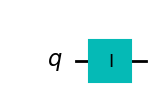

In [140]:
sampleI().draw(output='mpl')

In [42]:
pointsI = [ point(sampleI) for i in range(100) ]

In [43]:
bloch_sphere(points=pointsI, points_color=color)

In [44]:
h_i, p_i = expressibility(1, sampleI, bins=bins)

-0.6632455910006915


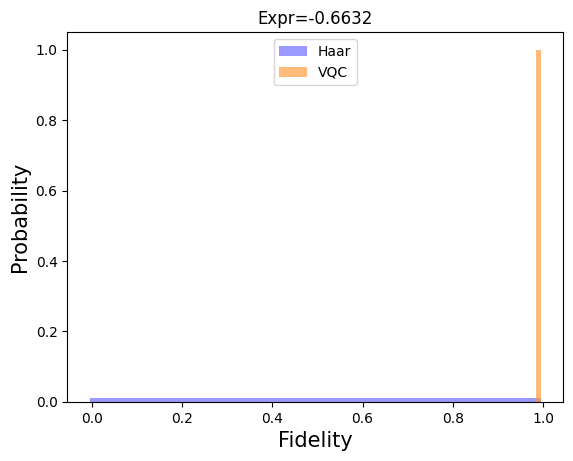

In [146]:
fig, ax = plt.subplots()
plt.bar([ i/100 for i in range(bins) ], h_i, color="#9999FF", label="Haar", width=0.01)
plt.bar([ i/100 for i in range(bins) ], p_i, color="#FF9933AA", label="VQC", width=0.01)
plt.ylabel("Probability", fontsize=15)
plt.xlabel("Fidelity", fontsize=15)
plt.title("Expr=-0.6632")
ax.legend(loc="upper center")

### 2.4.2 HU1

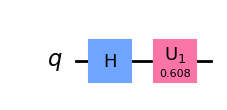

In [141]:
sampleHU1().draw(output='mpl')

In [103]:
pointsHU1 = [ point(sampleHU1) for i in range(2000) ]

In [104]:
bloch_sphere(points=pointsHU1, points_color=color)

In [106]:
h_hu1, p_hu1 = expressibility(1, sampleHU1, bins=bins)

0.6641890849616948


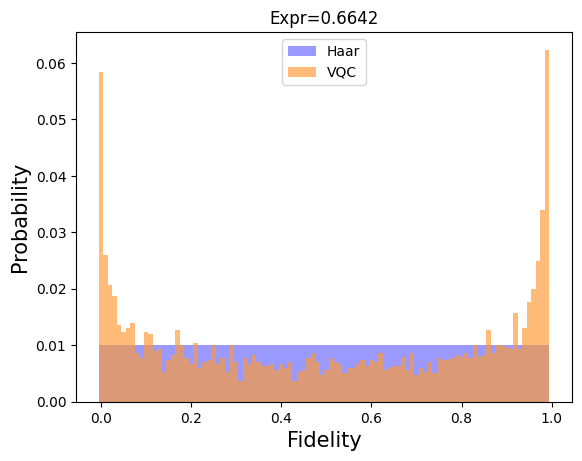

In [107]:
fig, ax = plt.subplots()
plt.bar([ i/100 for i in range(bins) ], h_hu1, color="#9999FF", label="Haar", width=0.01)
plt.bar([ i/100 for i in range(bins) ], p_hu1, color="#FF9933AA", label="VQC", width=0.01)
plt.ylabel("Probability", fontsize=15)
plt.xlabel("Fidelity", fontsize=15)
plt.title("Expr=0.6642")
ax.legend(loc="upper center")

### 2.4.3 HU2

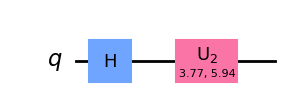

In [143]:
sampleHU2().draw(output='mpl')

In [127]:
pointsHU2 = [ point(sampleHU2) for i in range(2000) ]

In [128]:
bloch_sphere(points=pointsHU2, points_color=color)

In [129]:
h_hu2, p_hu2 = expressibility(1, sampleHU2, bins=bins)

1.5326961912972263


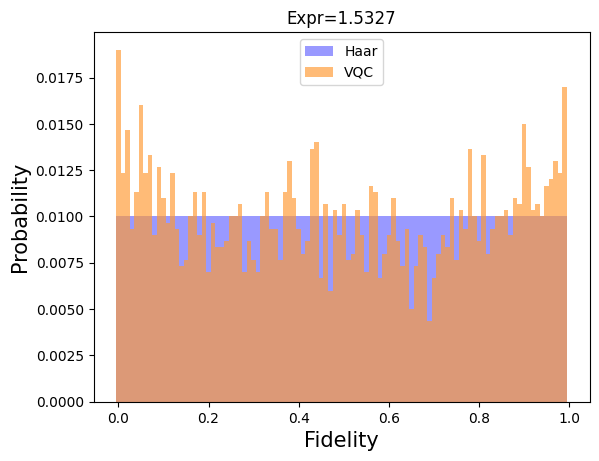

In [130]:
fig, ax = plt.subplots()
plt.bar([ i/100 for i in range(bins) ], h_hu2, color="#9999FF", label="Haar", width=0.01)
plt.bar([ i/100 for i in range(bins) ], p_hu2, color="#FF9933AA", label="VQC", width=0.01)
plt.ylabel("Probability", fontsize=15)
plt.xlabel("Fidelity", fontsize=15)
plt.title("Expr=1.5327")
ax.legend(loc="upper center")

### 2.4.4 HU3

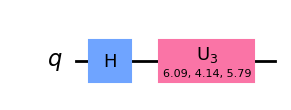

In [144]:
sampleHU3().draw(output='mpl')

In [136]:
pointsHU3 = [ point(sampleHU3) for i in range(2000) ]

In [137]:
bloch_sphere(points=pointsHU3, points_color=color)

In [138]:
h_hu3, p_hu3 = expressibility(1, sampleHU3, bins=bins)

1.8719749544100879


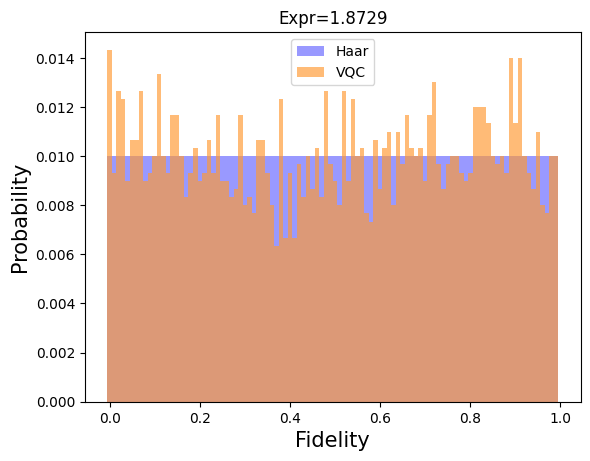

In [139]:
fig, ax = plt.subplots()
plt.bar([ i/100 for i in range(bins) ], h_hu3, color="#9999FF", label="Haar", width=0.01)
plt.bar([ i/100 for i in range(bins) ], p_hu3, color="#FF9933AA", label="VQC", width=0.01)
plt.ylabel("Probability", fontsize=15)
plt.xlabel("Fidelity", fontsize=15)
plt.title("Expr=1.8729")
ax.legend(loc="upper center")